 <!DOCTYPE html>
<html>
<head>
  <title>ESI CNN </title>
</head>
<body>

<h1>Training of the CNN on the synthetic data</h1>
<p>Here we load the data and corresponding labels. We normalize the data and reshape them for the CNN training. Later we create the CNN architecture and train the CNN with the synthetic data. At the end of the notebook, we plot parity plots for all the parameters. </p>
<p>To make the notebook simple, we are using only a small amount of data (50 R(q,t)) to train the CNN. WE load data from a "Training data" folder.</p>

</body>
</html> 

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import keras
%matplotlib inline

In [2]:
#!pip install sklearn
#import sklearn
#from sklearn import preprocessing

In [3]:
import matplotlib.pylab as plt
import numpy as np
import pickle

from matplotlib import image
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [4]:
T_data0 = np.load('Training data/training_data.npy', allow_pickle=True)


print(T_data0.shape)


T_data = T_data0
q_values = np.linspace(0.01, 0.14, 109)
#cycle 100s
print(T_data.shape)
print(q_values.shape)


(109, 4000)
(109, 4000)
(109,)


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.94516205 0.9219699  0.90438654 0.88969116 0.87684117
 0.86530353 0.85476173 0.84500937 0.83590288 0.82733751 0.81923399
 0.81153063 0.80417822 0.79713676 0.79037323 0.78385993 0.77757341
 0.77149355 0.76560297 0.75988651 0.75433086 0.74892426 0.74365624
 0.73851745 0.73349951 0.72859483 0.72379657 0.71909847 0.71449486
 0.70998053 0.70555071 0.701201   0.69692734 0.692726   0.6885935
 0.68452662 0.68052235 0.6765779  0.67269067 0.66885822 0.66507827
 0.66134868 0.65766744 0.65403266 0.65044258 0.64689553 0.64338993
 0.6399243  0.63649724 0.63310743 0.62975361 0.62643461 0.62314931
 0.61989664 0.61667562 0.61348528 0.61032472 0.6071931  0.60408961
 0.60101348 0.59796397 0.59494041 0.59194214 0.58896853 0.586019
 0.58309299 0.58018998 0.57730945 0.57445094 0.571614   0.5687982
 0.56600314 0.56322843 

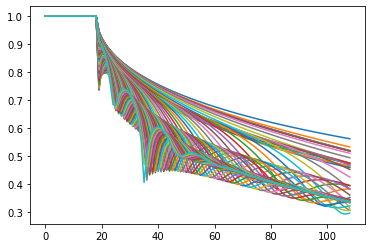

(4000, 109)
(4000, 109)
(50, 80, 109, 1)


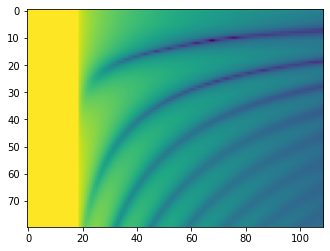

In [5]:
##data normalization
Training_data = (np.log(T_data)+20)/(20)
print((Training_data[:,5]))
plt.plot(Training_data[:,0:80])
plt.show()
T = np.transpose(Training_data)
print(T.shape)

T_x = np.reshape(T, [50, 80, 109, 1])

print(T.shape)
print(T_x.shape)

plt.imshow(T_x[42,:,:,:])
plt.show()


In [6]:
Label0 = np.load('Training data/label_Theta.npy', allow_pickle=True)

print(Label0.shape)

Label = Label0
Labels = Label[:,:]
print(Labels.shape)

#Labels normalization
Training_y = np.zeros([10,0])
print(Labels[9,:])
#G1
Labels[:,0] = Labels[:,0]-0.1 
print("G1:",np.min(Labels[:,0]),np.max(Labels[:,0]))

#G2
Labels[:,1] = Labels[:,1] - 0.2
print("G2:",min(Labels[:,1]),max(Labels[:,1]))

#G3
Labels[:,2] = Labels[:,2] - 0.2
print("G3:",min(Labels[:,2]),max(Labels[:,2]))

#G4
Labels[:,3] = Labels[:,3]*0.55
print("G4:",min(Labels[:,3]),max(Labels[:,3]))

#a
Labels[:,4] = Labels[:,4]*1.5
print("a:",min(Labels[:,4]),max(Labels[:,4]))

#b
Labels[:,5] = (Labels[:,5]+0.5)/1.3
print("b(exp decay):",min(Labels[:,5]),max(Labels[:,5]))

#c
Labels[:,6] = (Labels[:,6])*2
print("c:",min(Labels[:,6]),max(Labels[:,6]))

#d
Labels[:,7] = (Labels[:,7]+7.1)/7.5
print("d:",min(Labels[:,7]),max(Labels[:,7]))

#g
Labels[:,8] = Labels[:,8]*9
print("g:",min(Labels[:,8]),max(Labels[:,8]))

#sld
Labels[:,9] = Labels[:,9]/2e15
print("SLD:",min(Labels[:,9]),max(Labels[:,9]))

Labels_a = tf.reshape(Labels, [50,10])

print(Labels_a[9,:])

print("min_max of decay is:",min(Labels[:,2]),max(Labels[:,2]))


(50, 10)
(50, 10)
[ 9.15360795e-01  8.39129188e-01  8.15546955e-01  1.44073271e+00
  4.25670624e-01  5.68451358e-01  1.93828512e-01 -2.37865293e+00
  1.78094852e-02  8.89207762e+14]
G1: 0.42357182316869624 0.9960411751931698
G2: 0.31264580674623327 0.8533223084253214
G3: 0.5096286388614333 0.9976748566639384
G4: 0.496099077124988 0.9320850041371723
a: 0.32701074143295916 0.8594457283024506
b(exp decay): 0.4315089848754137 0.9044266967062095
c: 0.24484823409016288 0.7879069598344122
d: 0.038542643202681505 0.9221917086338601
g: 0.04661166900112835 0.924217775161194
SLD: 0.43284518659872806 0.9197085415661308
tf.Tensor(
[0.8153608  0.63912919 0.61554696 0.79240299 0.63850594 0.82188566
 0.38765702 0.62951294 0.16028537 0.44460388], shape=(10,), dtype=float64)
min_max of decay is: 0.5096286388614333 0.9976748566639384


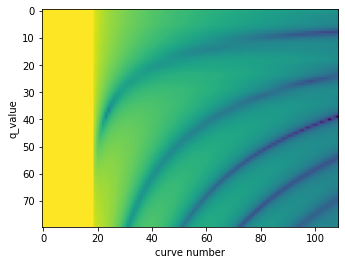

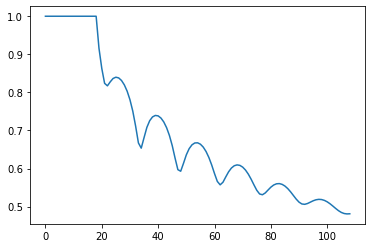

In [7]:
plt.imshow(T_x[10,:,:,0])
plt.ylabel('q_value')
plt.xlabel('curve number')
plt.show()
plt.plot(T_x[30,79,:,0])
plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Dropout, Flatten, BatchNormalization
from keras import metrics
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

In [9]:
def y_absolute_error(ind):
    def abs_err(y_true, y_pred):
        absolute_error = keras.backend.mean(abs(y_true[ind] - y_pred[ind]), axis=0)
        return absolute_error

    return abs_err

In [10]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(32, (2, 2),activation="relu", input_shape = [80,109,1]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (2, 2), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (2, 2), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (2, 2), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (2, 2), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (2, 2), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (2, 2), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (2, 2), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, (2, 2), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (2, 2), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 108, 32)       160       
_________________________________________________________________
batch_normalization (BatchNo (None, 79, 108, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 107, 32)       4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 53, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 53, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 52, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 38, 52, 64)        2

In [11]:
model.compile(optimizer= 'Adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


history = model.fit(T_x, #X_training,
                    Labels_a, #thickness_training,
                    epochs=1000,
                    batch_size=512,
                    verbose=1,
                    validation_split=0.05,

                   )

score, acc = model.evaluate(T_x, Labels_a)

print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.3821 - mean_absolute_error: 0.5533 - val_loss: 0.4322 - val_mean_absolute_error: 0.6279
Epoch 2/1000
1/1 [==============================] - 0s 98ms/step - loss: 0.2906 - mean_absolute_error: 0.4789 - val_loss: 0.4303 - val_mean_absolute_error: 0.6264
Epoch 3/1000
1/1 [==============================] - 0s 94ms/step - loss: 0.1644 - mean_absolute_error: 0.3373 - val_loss: 0.4279 - val_mean_absolute_error: 0.6245
Epoch 4/1000
1/1 [==============================] - 0s 95ms/step - loss: 0.1660 - mean_absolute_error: 0.3228 - val_loss: 0.4268 - val_mean_absolute_error: 0.6237
Epoch 5/1000
1/1 [==============================] - 0s 96ms/step - loss: 0.1419 - mean_absolute_error: 0.2955 - val_loss: 0.4253 - val_mean_absolute_error: 0.6224
Epoch 6/1000
1/1 [==============================] - 0s 98ms/step - loss: 0.1447 - mean_absolute_error: 0.3114 - val_loss: 0.4235 - val_mean_absolute_error: 0.6210
Epoch 7/1000
1/1 [======

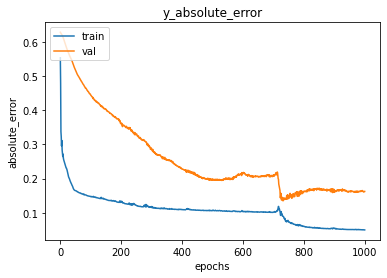

In [12]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('y_absolute_error')
plt.ylabel('absolute_error')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

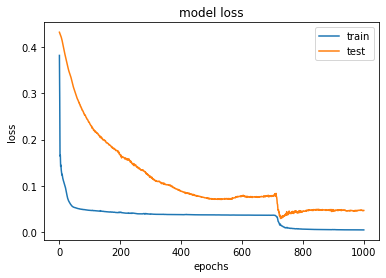

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

[0.52193445 0.7702471  0.59170437 0.7413906  0.6476549  0.41771048
 0.44108227 0.73798597 0.33347997 0.58343375]
tf.Tensor(
[0.49896736 0.78243473 0.55462088 0.80039684 0.63180394 0.43928263
 0.37353709 0.70038843 0.36645639 0.52798539], shape=(10,), dtype=float64)


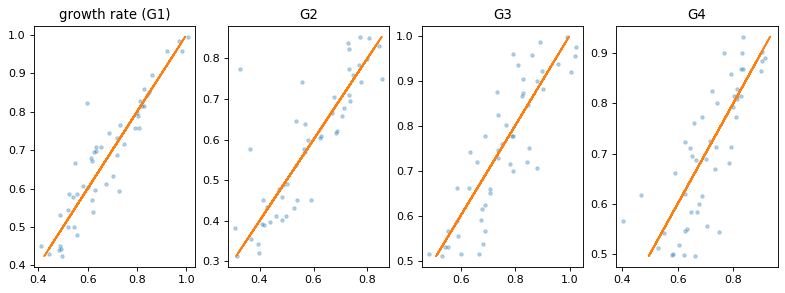

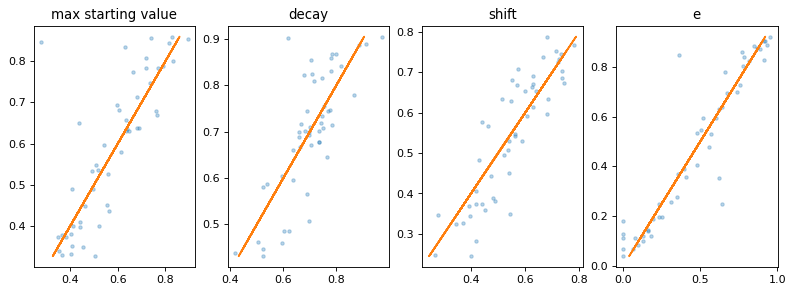

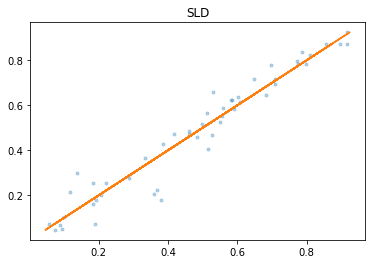

In [14]:
labels_predicted = model.predict(T_x)
curve_number = np.linspace(0, 80, 80)

label_pred = labels_predicted[8,:]
t_pred = label_pred[:]
print(t_pred)
print(Labels_a[8])

figure(figsize=(12,4), dpi=80)
plt.subplot(1,4,1)
plt.plot(labels_predicted[:,0], Labels_a[:,0],'.', alpha =0.3)
plt.plot(Labels_a[:,0],Labels_a[:,0])
plt.title('growth rate (G1)')
#plt.show()

plt.subplot(1,4,2)
plt.plot(labels_predicted[:,1], Labels_a[:,1],'.', alpha =0.3)
plt.plot(Labels_a[:,1],Labels_a[:,1])
plt.title('G2')
#plt.show()

plt.subplot(1,4,3)
plt.plot(labels_predicted[:,2], Labels_a[:,2],'.', alpha =0.3)
plt.plot(Labels_a[:,2],Labels_a[:,2])
plt.title('G3')
#plt.show()

plt.subplot(1,4,4)
plt.plot(labels_predicted[:,3], Labels_a[:,3],'.', alpha =0.3)
plt.plot(Labels_a[:,3],Labels_a[:,3])
plt.title('G4')
plt.show()

figure(figsize=(12,4), dpi=80)
plt.subplot(1,4,1)
plt.plot(labels_predicted[:,4], Labels_a[:,4],'.', alpha =0.3)
plt.plot(Labels_a[:,4],Labels_a[:,4])
plt.title('max starting value')
#plt.show()

plt.subplot(1,4,2)
plt.plot(labels_predicted[:,5], Labels_a[:,5],'.', alpha =0.3)
plt.plot(Labels_a[:,5],Labels_a[:,5])
plt.title('decay')
#plt.show()

plt.subplot(1,4,3)
plt.plot(labels_predicted[:,6], Labels_a[:,6],'.', alpha =0.3)
plt.plot(Labels_a[:,6],Labels_a[:,6])
plt.title('shift')
#plt.show()

plt.subplot(1,4,4)
plt.plot(labels_predicted[:,7], Labels_a[:,7],'.', alpha =0.3)
plt.plot(Labels_a[:,7],Labels_a[:,7])
plt.title('e')
plt.show()

plt.plot(labels_predicted[:,8], Labels_a[:,8],'.', alpha =0.3)
plt.plot(Labels_a[:,8],Labels_a[:,8])
plt.title('SLD')
plt.show()